In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.10066
1,0.029389,0.206580,0.48861,1.43430,NaN,NaN,1.42850,NaN,1.19480,NaN,NaN,NaN
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.63358
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.73460
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.94706
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.85140
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.75560
397,NaN,-1.993300,1.32480,1.77210,NaN,1.47010,NaN,NaN,NaN,0.95496,NaN,2.12380
398,7.293000,-0.411470,2.49480,NaN,NaN,NaN,2.95160,NaN,0.99059,3.43740,NaN,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	91
float64		column 2	39
float64		column 3	26
float64		column 4	53
float64		column 5	66
float64		column 6	105
float64		column 7	52
float64		column 8	79
float64		column 9	104
float64		column 10	91
float64		column 11	105
float64		column 12	131


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,309.000000,361.000000,374.000000,347.000000,334.000000,295.000000,348.000000,321.000000,296.000000,309.000000,295.000000,269.000000
mean,-0.082023,0.133851,2.043520,1.904626,1.920569,1.984614,2.057205,1.957299,2.007971,2.025709,1.963717,1.934481
std,2.550871,2.679375,1.155069,1.147650,1.149389,1.124423,1.151321,1.133896,1.159999,1.148172,1.188307,1.168119
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.002782
25%,-0.653930,-0.729260,1.097750,0.952680,0.880200,1.097800,1.060125,1.015700,1.083875,1.045500,0.858770,0.890270
50%,-0.019984,0.058074,2.098450,1.772100,1.861950,2.032500,2.119600,1.975400,2.144100,2.053500,1.965600,1.789200
75%,0.794360,0.876600,3.014050,2.883850,2.928225,2.951050,3.016100,3.009100,2.952150,3.041000,2.967150,2.946100
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.994400,3.985500,3.962700,3.967600,3.996000


<AxesSubplot:>

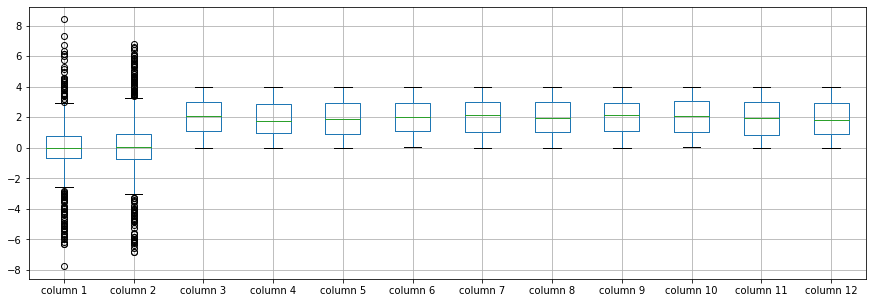

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.082023
column 2     0.133851
column 3     2.043520
column 4     1.904626
column 5     1.920569
column 6     1.984614
column 7     2.057205
column 8     1.957299
column 9     2.007971
column 10    2.025709
column 11    1.963717
column 12    1.934481
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.021259,-0.066414,-0.038860,-0.022437,0.030466,-0.021389,0.077001,-0.022345,0.037235,-0.007280,0.099690
column 2,0.021259,1.000000,-0.018094,0.045270,-0.056224,-0.066206,0.014844,-0.011826,-0.019794,-0.024472,-0.024043,0.085999
column 3,-0.066414,-0.018094,1.000000,0.021887,-0.030514,-0.020478,-0.079280,0.054829,0.135905,-0.032479,-0.118187,0.036243
column 4,-0.038860,0.045270,0.021887,1.000000,0.054900,0.064026,0.013767,0.042165,-0.023910,0.112495,0.003322,-0.095010
column 5,-0.022437,-0.056224,-0.030514,0.054900,1.000000,0.084603,0.063906,-0.030781,0.047420,-0.025852,-0.009709,-0.075467
column 6,0.030466,-0.066206,-0.020478,0.064026,0.084603,1.000000,-0.007510,0.079072,0.043397,-0.007128,0.077056,-0.047333
column 7,-0.021389,0.014844,-0.079280,0.013767,0.063906,-0.007510,1.000000,-0.026446,0.106982,0.013026,-0.000312,-0.083835
column 8,0.077001,-0.011826,0.054829,0.042165,-0.030781,0.079072,-0.026446,1.000000,-0.005359,-0.176837,-0.021782,0.014368
column 9,-0.022345,-0.019794,0.135905,-0.023910,0.047420,0.043397,0.106982,-0.005359,1.000000,0.080205,-0.028039,0.034873
column 10,0.037235,-0.024472,-0.032479,0.112495,-0.025852,-0.007128,0.013026,-0.176837,0.080205,1.000000,0.004803,-0.015616


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+24,12+24+24,12+24+24+24,12+24+24+24+24,12+24+24+24+24+24,12+24+24+24+24+24+24,12+24+24+24+24+24+24+24,12+24+24+24+24+24+24,12+24+24+24+24+24,12+24+24+24+24,12+24+24+24,12+24+24,12+24,12], vae_layer = False, seed = 24)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 22.344937744140626
Epoch: 1 , loss: 22.300792236328125
Epoch: 2 , loss: 22.293016662597655
Epoch: 3 , loss: 22.207325744628907
Epoch: 4 , loss: 22.158766021728514
Epoch: 5 , loss: 21.986584396362304
Epoch: 6 , loss: 21.076401596069335
Epoch: 7 , loss: 19.12751968383789
Epoch: 8 , loss: 18.16687324523926
Epoch: 9 , loss: 17.786566886901856
Epoch: 10 , loss: 17.699247817993164
Epoch: 11 , loss: 17.505546951293944
Epoch: 12 , loss: 17.266335639953613
Epoch: 13 , loss: 17.279407577514647
Epoch: 14 , loss: 16.723883209228514
Epoch: 15 , loss: 17.028910522460937
Epoch: 16 , loss: 16.875009651184083
Epoch: 17 , loss: 16.5178821182251
Epoch: 18 , loss: 16.52017776489258
Epoch: 19 , loss: 16.40603137969971
Epoch: 20 , loss: 16.317112274169922
Epoch: 21 , loss: 16.177229270935058
Epoch: 22 , loss: 15.986479568481446
Epoch: 23 , loss: 15.940925216674804
Epoch: 24 , loss: 15.889828720092773
Epoch: 25 , loss: 15.91

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.0,0.000000,-2.373149,-0.514368,0.000000,0.614876,0.000000,-1.337442,-0.204290,-3.122512
2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
396,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
397,3.450543,0.0,0.0,0.000000,-1.650245,0.000000,0.037228,-0.943416,-2.562793,0.000000,-0.617360,0.000000
398,0.000000,0.0,0.0,0.748862,-1.851419,-2.269833,0.000000,0.870129,0.000000,0.000000,-0.662594,1.003310


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(54.43993073593195, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.3334258570489277

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.836300,2.886600,2.469600,0.215410,3.090000,0.783430,0.510350,0.030430,0.100660
1,0.029389,0.206580,0.48861,1.434300,0.756751,0.763432,1.428500,0.758206,1.194800,0.794358,0.780440,0.721988
2,-1.115400,0.217560,1.61050,1.337100,3.768200,1.210000,3.996300,2.217300,3.902900,1.514400,2.438900,0.633580
3,-0.539160,-0.061874,0.36486,0.332780,0.190270,0.567160,1.660100,2.352700,0.661260,3.135100,3.938100,3.734600
4,-0.268400,-1.006000,2.88220,1.561600,3.201400,3.377400,1.522600,0.984750,3.109400,3.656400,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.704800,0.882690,0.354060,1.627800,3.294000,1.085000,0.157400,0.465040,2.851400
396,0.264630,-6.107600,3.90540,1.337700,1.418700,1.686100,1.095100,3.793600,0.127900,0.542490,3.365800,3.755600
397,-0.028557,-1.993300,1.32480,1.772100,0.900655,1.470100,0.962628,0.897684,0.914507,0.954960,0.908940,2.123800
398,7.293000,-0.411470,2.49480,1.145412,1.147581,1.140267,2.951600,1.148129,0.990590,3.437400,1.153606,1.090522


In [20]:
imputations[-1].to_excel("Difdoug_AN_20(imp).xlsx", index=False, header=False)